### aim: show cfcs and co2 concentrations from steve's data for ukesm

### date: 

In [51]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [52]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [53]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)


In [54]:
date = np.arange(1950,2101,1)
fixed = np.copy(date)
fixed[:] = 1
hist = np.copy(fixed)
o1990 = np.copy(date)



In [55]:
import os
directory = '/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/ukesm-atmo'

# Dictionary to store the numpy arrays with filenames as keys
data_dict = {}

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.dat'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        
        # Load the data from the .dat file into a NumPy array
        data = np.loadtxt(file_path, delimiter=',')
        
        # Remove the '.dat' extension from the filename
        key = os.path.splitext(filename)[0]
        
        # Add the NumPy array to the dictionary
        data_dict[key] = data
        
        print(f"Loaded {filename} into numpy array with key '{key}'")

Loaded cfc11_data_1950.dat into numpy array with key 'cfc11_data_1950'
Loaded cfc12_data_ssp370.dat into numpy array with key 'cfc12_data_ssp370'
Loaded ods_years_1950.dat into numpy array with key 'ods_years_1950'
Loaded cfc12_data_hist.dat into numpy array with key 'cfc12_data_hist'
Loaded cfc11_data_ssp370.dat into numpy array with key 'cfc11_data_ssp370'
Loaded co2_years_hist.dat into numpy array with key 'co2_years_hist'
Loaded co2_years_ssp.dat into numpy array with key 'co2_years_ssp'
Loaded cfc12_data_1950.dat into numpy array with key 'cfc12_data_1950'
Loaded co2_data_ssp126.dat into numpy array with key 'co2_data_ssp126'
Loaded cfc11_data_ssp126.dat into numpy array with key 'cfc11_data_ssp126'
Loaded cfc11_data_hist.dat into numpy array with key 'cfc11_data_hist'
Loaded ods_years_hist.dat into numpy array with key 'ods_years_hist'
Loaded cfc12_data_ssp126.dat into numpy array with key 'cfc12_data_ssp126'
Loaded cfc11_data_1990.dat into numpy array with key 'cfc11_data_1990'


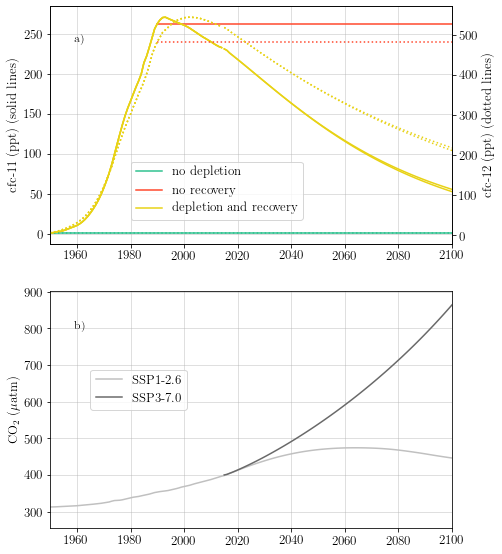

In [56]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)


fact = 1.2
fig, axs = plt.subplots(2, 1, figsize=(6*fact, 8*fact))

axs[0].plot(data_dict['ods_years_1950'],data_dict['cfc11_data_1950'], color = '#2DC18E', label = 'no depletion')
axs[0].plot(data_dict['ods_years_1990'],data_dict['cfc11_data_1990'], color =  '#FF462B', label = 'no recovery')
axs[0].plot(data_dict['ods_years_hist'],data_dict['cfc11_data_hist'], color =  '#E8D215', label = 'depletion and recovery')
axs[0].plot(data_dict['ods_years_hist'],data_dict['cfc11_data_hist'], color =  '#E8D215')
axs[0].plot(data_dict['ods_years_hist'],data_dict['cfc11_data_hist'], color =  '#E8D215')
axs[0].plot(data_dict['ods_years_ssp'],data_dict['cfc11_data_ssp126'], color =  '#E8D215')
axs[0].plot(data_dict['ods_years_ssp'],data_dict['cfc11_data_ssp370'], color =  '#E8D215')

axs0 = axs[0].twinx()
axs0.plot(data_dict['ods_years_1950'],data_dict['cfc12_data_1950'], color = '#2DC18E', linestyle = ':' )
axs0.plot(data_dict['ods_years_1990'],data_dict['cfc12_data_1990'], color =  '#FF462B', linestyle = ':' )
axs0.plot(data_dict['ods_years_hist'],data_dict['cfc12_data_hist'], color =  '#E8D215', linestyle = ':' )
axs0.plot(data_dict['ods_years_hist'],data_dict['cfc12_data_hist'], color =  '#E8D215', linestyle = ':' )
axs0.plot(data_dict['ods_years_hist'],data_dict['cfc12_data_hist'], color =  '#E8D215', linestyle = ':' )
axs0.plot(data_dict['ods_years_ssp'],data_dict['cfc12_data_ssp126'], color =  '#E8D215', linestyle = ':' )
axs0.plot(data_dict['ods_years_ssp'],data_dict['cfc12_data_ssp370'], color =  '#E8D215', linestyle = ':' )

axs[1].plot(data_dict['co2_years_hist'],data_dict['co2_data_hist'], color = 'silver', label = 'SSP1-2.6' )
axs[1].plot(data_dict['co2_years_ssp'],data_dict['co2_data_ssp126'], color = 'silver')
axs[1].plot(data_dict['co2_years_ssp'],data_dict['co2_data_ssp370'], color = 'dimgrey', label = 'SSP3-7.0' )

axs[0].set_ylabel('cfc-11 (ppt) (solid lines)')
axs0.set_ylabel('cfc-12 (ppt) (dotted lines)')
axs[1].set_ylabel('CO$_2$ ($\mu$atm)')

for ax in axs.ravel():
    ax.set_xlim([1950,2100])
    ax.grid(alpha = 0.5)
    
fig.text(0.17, 0.83, 'a)', fontsize=12, fontweight='normal', transform=plt.gcf().transFigure)
fig.text(0.17, 0.415, 'b)', fontsize=12, fontweight='normal', transform=plt.gcf().transFigure)

axs[0].legend(loc = [0.2,0.1])
axs[1].legend(loc = [0.1,0.5])